In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
massr = np.array(['0.1', '0.33', '0.5', '1', '2', '3', '10'])
par_rag = 0.999

<center>

# <span style="color:blue;"> Profilo d'eccentricità </span>

<center>

Calcoliamo il profilo d'eccentricità per il disco circum-secondario nel sistema binario con rapporti di masse 3:1 ed eccentricità identicamente nulla. Il sistema di riferimento che sto prendendo in considerazione è fisso, ossia caratterizzato da velocità angolare $\Omega$ nulla.

Il semi-asse di troncamento del disco è: 0.193 a. L'eccentricità del disco è: 0.315


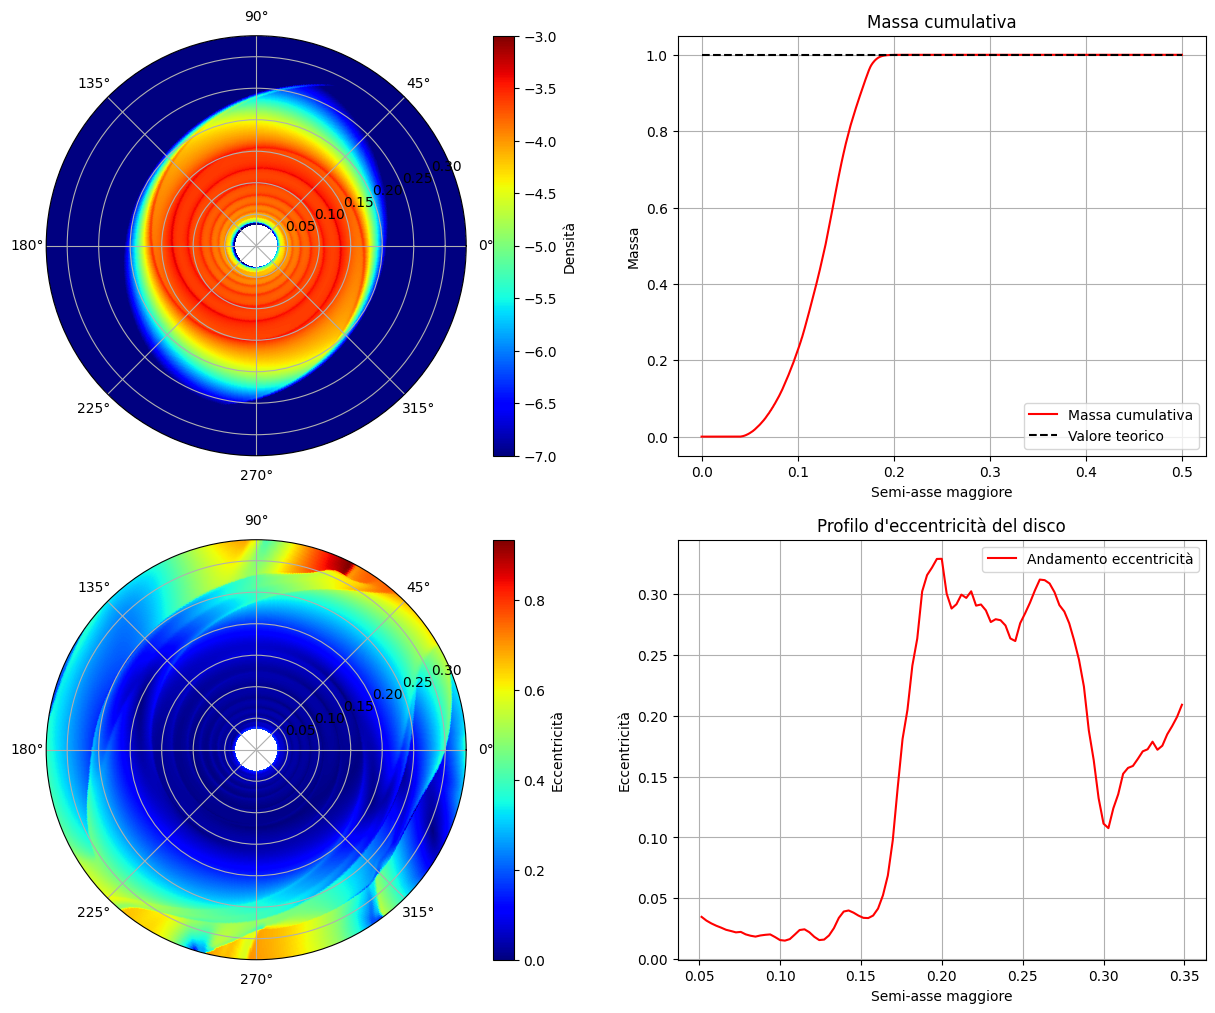

In [3]:
fig = plt.figure(figsize=(15, 12))

rho = np.fromfile("Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384, 1152)
vx = np.fromfile("Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384, 1152)
vy = np.fromfile("Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384, 1152)


rmin = 0.4; rmax = 4.0; dist = 12                                   #Limiti della griglia
r = np.linspace(rmin, rmax, 385)                                    #Posizioni radiali dei bordi delle cellette
r_plot = np.linspace((rmin + r[1])/2, (rmax + r[383])/2, 384)       #Posizioni radiali dei centri delle celle

theta = np.linspace(-np.pi, np.pi, 1152)        #Partizione angolare
Theta, R = np.meshgrid(theta, r_plot/dist)

uno = np.zeros((384, 1152))     #Matrice di uno
zero = np.zeros((384, 1152))     #Matrice di zeri
rcal = np.zeros((384, 1152))    #Raggi per calcolo dell'energia
area = np.zeros((384, 1152))    #Area delle singole cellette
for i in range(0, 384):
    #Valuto area della singola cella
    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        rcal[i, j] = r_plot[i]
        area[i, j] = appo
        zero[i, j] = 0
        uno[i, j] = 1

mass = rho * area                           #Massa delle celle
ene = 0.5 * (vx**2 + vy**2) - 1/rcal        #Energia delle singole celle
sax = - 1.0/(2 * ene * dist)                #Semi-asse maggiore
mom_ang = mass * rcal * vx                  #Momento angolare 
mu = mass/(uno + mass)                      #Massa ridotta
eps = uno - mom_ang**2/(dist*sax*mu**2)     #Valuto argomento della radice
ecc = np.sqrt(np.maximum(zero, eps))        #Calcolo l'eccentricità


#--------------------------------------------#
#       Calcolo il semi-asse maggiore        #
#--------------------------------------------#
sax_mag = np.linspace(0, 0.5, 1000)              #Binno il semi-asse maggiore
m_prog = []                                     #Contenitore delle masse progressive

for i in range(0, len(sax_mag)):                        #Determino le masse progressive
    m_prog.append(mass[sax < sax_mag[i]].sum())

sax_out = 0; ind = 0
for i in range(0, len(sax_mag)):                        #Determino il semi-asse di troncamento
    if m_prog[i] > 0.999 * m_prog[999]:
        sax_out = sax_mag[i]
        ind = i
        break

#--------------------------------------------#
#           Densità nella griglia            #
#--------------------------------------------#
ax1 = fig.add_subplot(2, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
plt.colorbar(cax, label='Densità')
ax1.set_rmax(rmax/dist)



#--------------------------------------------#
#         Eccentricità nella griglia         #
#--------------------------------------------#
ax2 = fig.add_subplot(2, 2, 3, projection='polar')
cax = ax2.pcolormesh(Theta, R, ecc, cmap='jet', vmin = 0)
plt.colorbar(cax, label='Eccentricità')
ax2.set_rmin(0)
ax2.set_rmax(rmax/dist)



#--------------------------------------------#
#             Profilo di densità             #
#--------------------------------------------#
ax3 = fig.add_subplot(2, 2, 2)

m_prog = np.array(m_prog)
y_teo = np.zeros(1000)
for i in range(0, len(y_teo)):
    y_teo[i] = 0.999

ax3.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa cumulativa')
ax3.plot(sax_mag, y_teo, color = 'black', linestyle = '--', label = 'Valore teorico')
ax3.set_title(r"Massa cumulativa")
ax3.set_xlabel(r'Semi-asse maggiore')
ax3.set_ylabel('Massa')
ax3.legend(loc='best')
ax3.grid(True)



#--------------------------------------------#
#           Profilo di eccentricità          #
#--------------------------------------------#
ax4 = fig.add_subplot(2, 2, 4)
sax_mag = np.linspace(0.05, 0.35, 100)              #Binno il semi-asse
sax_plot = np.zeros(99)                             #Trovo semiasse per il plot
prof_ecc = np.zeros(99)                             #Prifilo eccentricità
for i in range(0, len(sax_plot)):
    sax_plot[i] = (sax_mag[i+1] + sax_mag[i])/2

for i in range(0, len(sax_mag) -1):
    mask = np.logical_and(sax < sax_mag[i+1], sax > sax_mag[i])
    prof_ecc[i] = ecc[mask].sum()/len(ecc[mask])

ax4.plot(sax_plot, prof_ecc, color = 'red', label = 'Andamento eccentricità')
ax4.set_title(r"Profilo d'eccentricità del disco")
ax4.set_xlabel(r'Semi-asse maggiore')
ax4.set_ylabel('Eccentricità')
ax4.legend(loc='best')
ax4.grid(True)

sax_mag = np.linspace(0, 0.5, 1000) 
#Determino eccentricità a bordo disco 
mask = np.logical_and(sax < sax_mag[ind+1], sax > sax_mag[ind-1])
ecc_out = ecc[mask].sum()/len(ecc[mask])

print("Il semi-asse di troncamento del disco è: " + str(round(sax_out, 3)) + " a. L'eccentricità del disco è: " + str(round(ecc_out, 3)))

plt.show()

### Sovrappongo l'ellisse

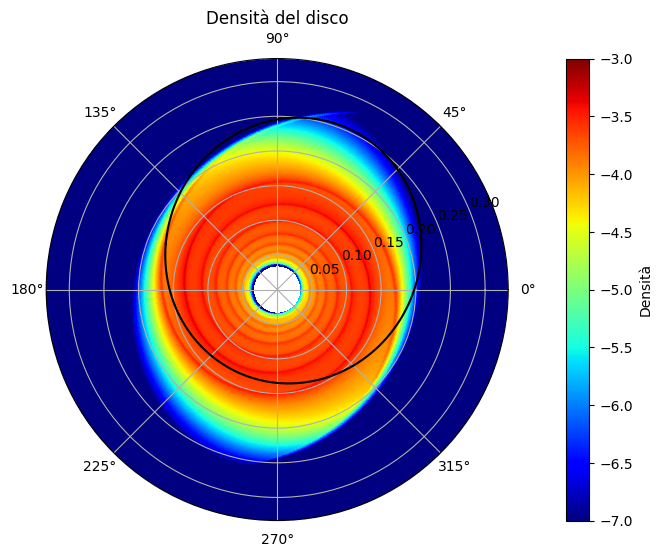

In [4]:
rmin = 0.4; rmax = 4.0; dist = 12       #Parametri della griglia                  

#-----------------------------------#
#          Creo la griglia          #
#-----------------------------------#
r = np.linspace(rmin, rmax, 385)
theta = np.linspace(-np.pi, np.pi, 1152)                               
r_plot = np.linspace((rmin + r[1])/2, (rmax + r[383])/2, 384)       
Theta, R = np.meshgrid(theta, r_plot/dist)

#-----------------------------------#
#          Disegno densità          #
#-----------------------------------#

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1, projection='polar')

cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
plt.colorbar(cax, label='Densità')

#-----------------------------------#
#          Disegno ellisse          #
#-----------------------------------#
theta = np.linspace(-9*np.pi/8, 2*np.pi-9*np.pi/8, 1000)
r = sax_out * (1 - ecc_out**2) / (1 + ecc_out * np.cos(theta + 5*np.pi/8))
plt.polar(theta, r, color = 'black')



ax.set_rmin(0.0)
ax.set_rmax(rmax/dist)
ax.set_title("Densità del disco")

plt.show()


<center>

# <span style="color:blue;"> Considero un caso problematico: disco circolare </span>

<center>

Lavoro ora con il disco circum-stellare presente nel caso di binaria con rapporto di masse 1:1. L'eccentricità presa in considerazione è 0.6.

Il semi-asse di troncamento del disco è: 0.122 a. L'eccentricità del disco è: 0.133


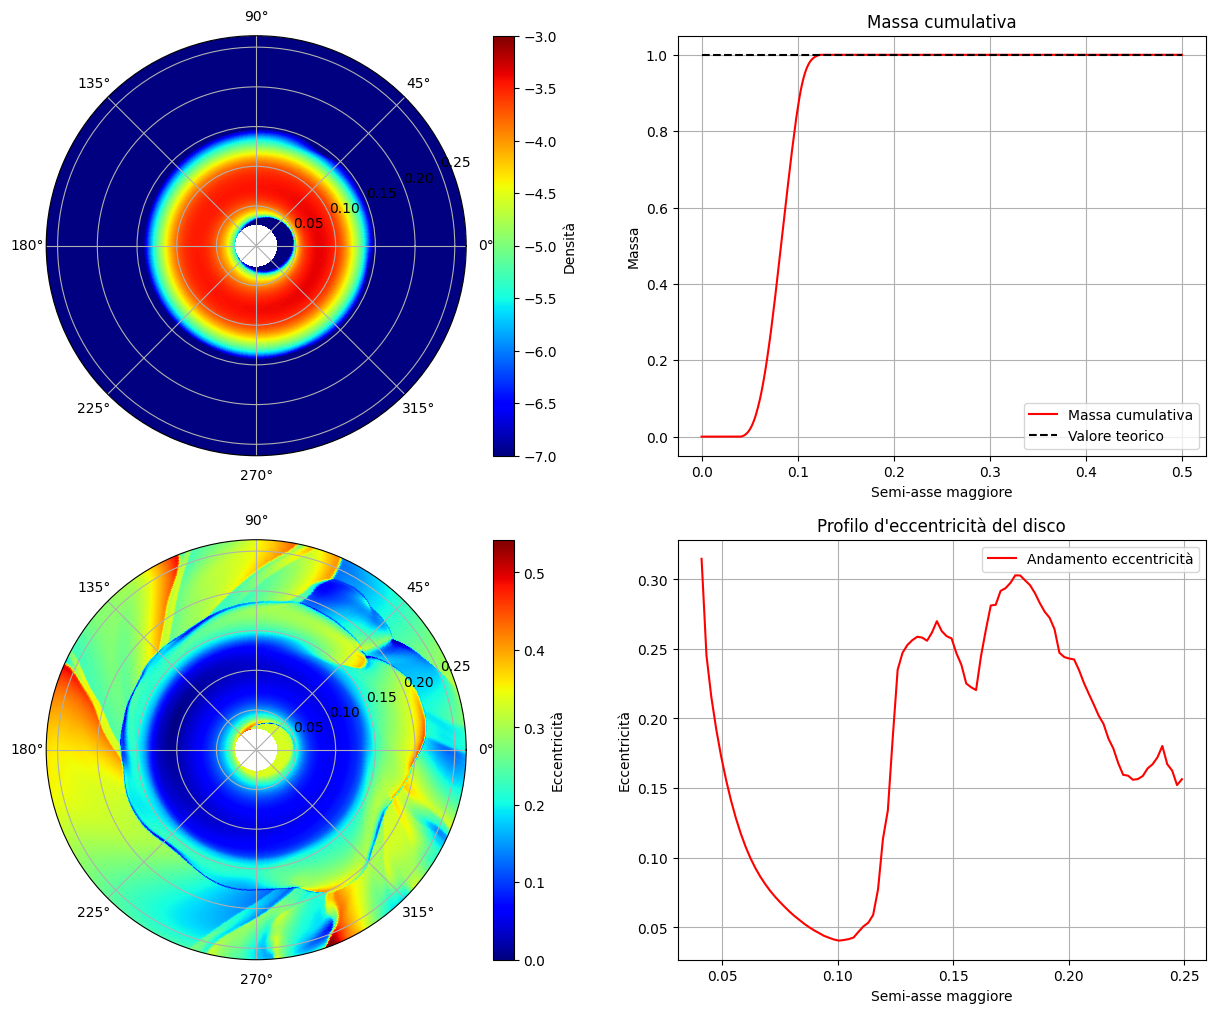

In [5]:
fig = plt.figure(figsize=(15, 12))

rho = np.fromfile("Alpha-3/HighEcc/MR1/gasdens100.dat").reshape(384, 1152)
vx = np.fromfile("Alpha-3/HighEcc/MR1/gasvx100.dat").reshape(384, 1152)
vy = np.fromfile("Alpha-3/HighEcc/MR1/gasvy100.dat").reshape(384, 1152)


rmin = 0.4; rmax = 4.0; dist = 15.13                                   #Limiti della griglia
r = np.linspace(rmin, rmax, 385)                                    #Posizioni radiali dei bordi delle cellette
r_plot = np.linspace((rmin + r[1])/2, (rmax + r[383])/2, 384)       #Posizioni radiali dei centri delle celle

theta = np.linspace(-np.pi, np.pi, 1152)        #Partizione angolare
Theta, R = np.meshgrid(theta, r_plot/dist)

uno = np.zeros((384, 1152))     #Matrice di uno
zero = np.zeros((384, 1152))     #Matrice di zeri
rcal = np.zeros((384, 1152))    #Raggi per calcolo dell'energia
area = np.zeros((384, 1152))    #Area delle singole cellette
for i in range(0, 384):
    #Valuto area della singola cella
    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        rcal[i, j] = r_plot[i]
        area[i, j] = appo
        zero[i, j] = 0
        uno[i, j] = 1

mass = rho * area                           #Massa delle celle
ene = 0.5 * (vx**2 + vy**2) - 1/rcal        #Energia delle singole celle
sax = - 1.0/(2 * ene * dist)                #Semi-asse maggiore
mom_ang = mass * rcal * vx                  #Momento angolare 
mu = mass/(uno + mass)                      #Massa ridotta
eps = uno - mom_ang**2/(dist*sax*mu**2)     #Valuto argomento della radice
ecc = np.sqrt(np.maximum(zero, eps))        #Calcolo l'eccentricità


#--------------------------------------------#
#       Calcolo il semi-asse maggiore        #
#--------------------------------------------#
sax_mag = np.linspace(0, 0.5, 1000)              #Binno il semi-asse maggiore
m_prog = []                                     #Contenitore delle masse progressive

for i in range(0, len(sax_mag)):                        #Determino le masse progressive
    m_prog.append(mass[sax < sax_mag[i]].sum())

sax_out = 0; ind = 0
for i in range(0, len(sax_mag)):                        #Determino il semi-asse di troncamento
    if m_prog[i] > 0.999 * m_prog[999]:
        sax_out = sax_mag[i]
        ind = i
        break

#--------------------------------------------#
#           Densità nella griglia            #
#--------------------------------------------#
ax1 = fig.add_subplot(2, 2, 1, projection='polar')
cax = ax1.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
plt.colorbar(cax, label='Densità')
ax1.set_rmax(rmax/dist)



#--------------------------------------------#
#         Eccentricità nella griglia         #
#--------------------------------------------#
ax2 = fig.add_subplot(2, 2, 3, projection='polar')
cax = ax2.pcolormesh(Theta, R, ecc, cmap='jet', vmin = 0)
plt.colorbar(cax, label='Eccentricità')
ax2.set_rmin(0)
ax2.set_rmax(rmax/dist)



#--------------------------------------------#
#             Profilo di densità             #
#--------------------------------------------#
ax3 = fig.add_subplot(2, 2, 2)

m_prog = np.array(m_prog)
y_teo = np.zeros(1000)
for i in range(0, len(y_teo)):
    y_teo[i] = 0.999

ax3.plot(sax_mag, m_prog/m_prog[999], color = 'red', label = 'Massa cumulativa')
ax3.plot(sax_mag, y_teo, color = 'black', linestyle = '--', label = 'Valore teorico')
ax3.set_title(r"Massa cumulativa")
ax3.set_xlabel(r'Semi-asse maggiore')
ax3.set_ylabel('Massa')
ax3.legend(loc='best')
ax3.grid(True)



#--------------------------------------------#
#           Profilo di eccentricità          #
#--------------------------------------------#
ax4 = fig.add_subplot(2, 2, 4)
sax_mag = np.linspace(0.04, 0.25, 100)              #Binno il semi-asse
sax_plot = np.zeros(99)                             #Trovo semiasse per il plot
prof_ecc = np.zeros(99)                             #Prifilo eccentricità
for i in range(0, len(sax_plot)):
    sax_plot[i] = (sax_mag[i+1] + sax_mag[i])/2

for i in range(0, len(sax_mag) -1):
    mask = np.logical_and(sax < sax_mag[i+1], sax > sax_mag[i])
    prof_ecc[i] = ecc[mask].sum()/len(ecc[mask])

ax4.plot(sax_plot, prof_ecc, color = 'red', label = 'Andamento eccentricità')
ax4.set_title(r"Profilo d'eccentricità del disco")
ax4.set_xlabel(r'Semi-asse maggiore')
ax4.set_ylabel('Eccentricità')
ax4.legend(loc='best')
ax4.grid(True)

sax_mag = np.linspace(0, 0.5, 1000) 
#Determino eccentricità a bordo disco 
mask = np.logical_and(sax < sax_mag[ind+1], sax > sax_mag[ind-1])
ecc_out = ecc[mask].sum()/len(ecc[mask])

print("Il semi-asse di troncamento del disco è: " + str(round(sax_out, 3)) + " a. L'eccentricità del disco è: " + str(round(ecc_out, 3)))

plt.show()

### Sovrappongo l'ellisse

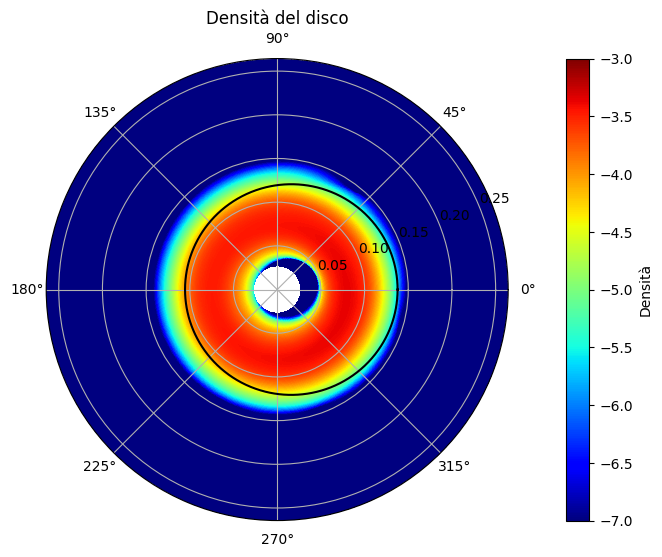

In [6]:
rmin = 0.4; rmax = 4.0; dist = 15.13       #Parametri della griglia                  

#-----------------------------------#
#          Creo la griglia          #
#-----------------------------------#
r = np.linspace(rmin, rmax, 385)
theta = np.linspace(-np.pi, np.pi, 1152)                               
r_plot = np.linspace((rmin + r[1])/2, (rmax + r[383])/2, 384)       
Theta, R = np.meshgrid(theta, r_plot/dist)

#-----------------------------------#
#          Disegno densità          #
#-----------------------------------#

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 1, 1, projection='polar')

cax = ax.pcolormesh(Theta, R, np.log10(rho), cmap='jet', vmin = -7, vmax = -3)
plt.colorbar(cax, label='Densità')

#-----------------------------------#
#          Disegno ellisse          #
#-----------------------------------#
theta = np.linspace(0, 2*np.pi, 1000)
r = sax_out * (1 - ecc_out**2) / (1 + ecc_out * np.cos(theta - np.pi))
plt.polar(theta, r, color = 'black')

ax.set_rmin(0.0)
ax.set_rmax(rmax/dist)
ax.set_title("Densità del disco")

plt.show()


<center>

# <span style="color:blue;"> Dove è contenuto effetivamente il 99.9% della massa </span>

<center>

Voglio determinare in che regioni è contenuto il 99.9% della massa: il criterio in questione è troppo poco stringente? Che regioni consentono il raggiungimento di tale percentuale?

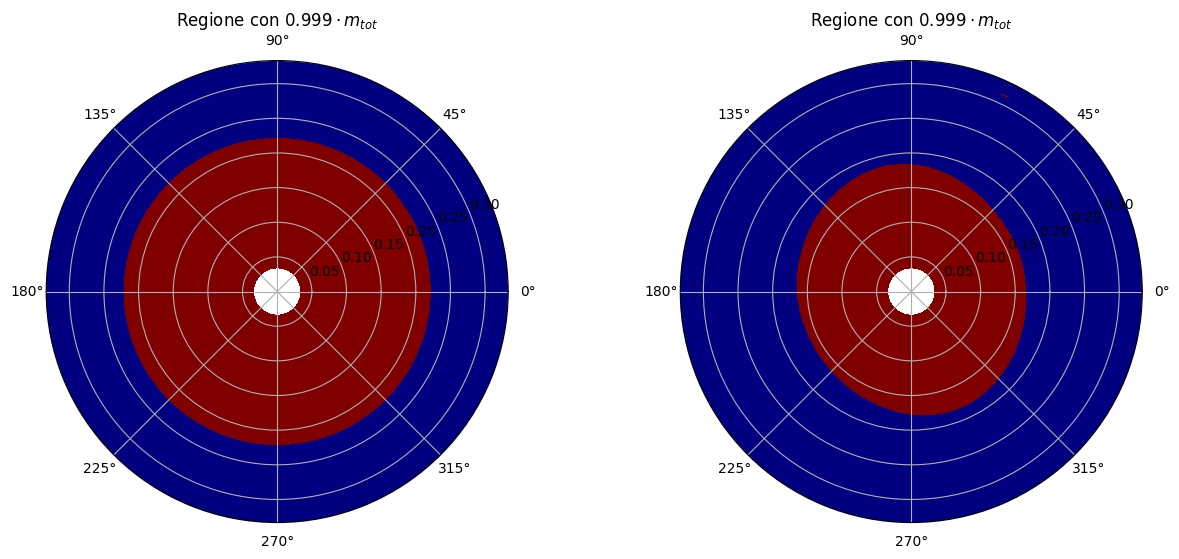

In [7]:
fig = plt.figure(figsize=(15, 6))

rho = np.fromfile("Alpha-3/NoEcc/MR0.33/gasdens100.dat").reshape(384, 1152)
vx = np.fromfile("Alpha-3/NoEcc/MR0.33/gasvx100.dat").reshape(384, 1152)
vy = np.fromfile("Alpha-3/NoEcc/MR0.33/gasvy100.dat").reshape(384, 1152)


#-------------------------------------------------#
#         Creo la griglia per gli output          #
#-------------------------------------------------# 
rmin = 0.4; rmax = 4.0; dist = 12
r = np.linspace(rmin, rmax, 385)
r_plot = np.linspace((r[1] + rmin)/2, (rmax + r[383])/2, 384)
theta = np.linspace(-np.pi, np.pi, 1152)                                      
Theta, R = np.meshgrid(theta, r_plot/dist)

rcal = np.zeros((384, 1152))
area = np.zeros((384, 1152))
for i in range(0, 384):
    appo = np.pi * (r[i+1]**2 - r[i]**2)/1152
    for j in range(0, 1152):
        area[i, j] = appo
        rcal[i, j] = r_plot[i]

massa = area * rho
m_prog = []


#-------------------------------------------------#
#               Lavoro con i raggi                #
#-------------------------------------------------# 
for i in range(0, len(r_plot)):
    m_prog.append(massa[rcal <= r_plot[i]].sum())

m_prog = np.array(m_prog)
for i in range(0, len(r_plot)):
    if m_prog[i] > 0.999 * m_prog[383]:
        ind = i
        r_tr = r_plot[i]
        break

col = np.zeros((384, 1152))
for i in range(0, 384):
    for j in range(0, 1152):
        if i <= ind:
            col[i, j] = 1

ax = fig.add_subplot(1, 2, 1, projection='polar')

cax = ax.pcolormesh(Theta, R, col, cmap='jet')
ax.set_rmin(0.0)
ax.set_rmax(rmax/dist)
ax.set_title(r"Regione con $0.999 \cdot m_{tot}$")


#-------------------------------------------------#
#               Lavoro con semi-assi              #
#-------------------------------------------------# 
ene = 0.5 * (vx**2 + vy**2) - 1/rcal
sax = -1.0/(2 * ene * dist)

sax_mag = np.linspace(0, 0.5, 1000)
m_prog = []                                     #Contenitore delle masse progressive

for i in range(0, len(sax_mag)):                        #Determino le masse progressive
    m_prog.append(mass[sax < sax_mag[i]].sum())

sax_out = 0; ind = 0
for i in range(0, len(sax_mag)):                        #Determino il semi-asse di troncamento
    if m_prog[i] > 0.999 * m_prog[999]:
        sax_out = sax_mag[i]
        ind = i
        break

col = np.zeros((384, 1152))

for i in range(0, 384):
    for j in range(0, 1152):
        if sax[i, j] < sax_out:
            col[i, j] = 1


ax = fig.add_subplot(1, 2, 2, projection='polar')

cax = ax.pcolormesh(Theta, R, col, cmap='jet')
ax.set_rmin(0.0)
ax.set_rmax(rmax/dist)
ax.set_title(r"Regione con $0.999 \cdot m_{tot}$")




plt.show()

<center>

# <span style="color:blue;"> Viscosità massima </span>

<center>

### Eccentricità binaria: e = 0.0

In [8]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 5.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e0 = np.zeros(7)
ecc_A2_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A2_e0[h] = rag.sum()/len(rag)
    ecc_A2_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e0[h], 3)))


Il raggio di troncamento è: 0.15 a.     L'eccentricità è pari a: 0.416
Il raggio di troncamento è: 0.218 a.     L'eccentricità è pari a: 0.279
Il raggio di troncamento è: 0.245 a.     L'eccentricità è pari a: 0.297
Il raggio di troncamento è: 0.298 a.     L'eccentricità è pari a: 0.277
Il raggio di troncamento è: 0.354 a.     L'eccentricità è pari a: 0.243
Il raggio di troncamento è: 0.387 a.     L'eccentricità è pari a: 0.225
Il raggio di troncamento è: 0.481 a.     L'eccentricità è pari a: 0.172


### Eccentricità binaria: e = 0.3

In [9]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e3 = np.zeros(7)
ecc_A2_e3 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A2_e3[h] = rag.sum()/len(rag)
    ecc_A2_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e3[h], 3)))


Il raggio di troncamento è: 0.119 a.     L'eccentricità è pari a: 0.218
Il raggio di troncamento è: 0.177 a.     L'eccentricità è pari a: 0.15
Il raggio di troncamento è: 0.198 a.     L'eccentricità è pari a: 0.165
Il raggio di troncamento è: 0.239 a.     L'eccentricità è pari a: 0.138
Il raggio di troncamento è: 0.269 a.     L'eccentricità è pari a: 0.163
Il raggio di troncamento è: 0.304 a.     L'eccentricità è pari a: 0.158
Il raggio di troncamento è: 0.384 a.     L'eccentricità è pari a: 0.173


### Eccentricità binaria: e = 0.6

In [10]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A2_e6 = np.zeros(7)
ecc_A2_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-2/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A2_e6[h] = rag.sum()/len(rag)
    ecc_A2_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A2_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A2_e6[h], 3)))


Il raggio di troncamento è: 0.071 a.     L'eccentricità è pari a: 0.088
Il raggio di troncamento è: 0.104 a.     L'eccentricità è pari a: 0.288
Il raggio di troncamento è: 0.121 a.     L'eccentricità è pari a: 0.291
Il raggio di troncamento è: 0.142 a.     L'eccentricità è pari a: 0.159
Il raggio di troncamento è: 0.163 a.     L'eccentricità è pari a: 0.124
Il raggio di troncamento è: 0.184 a.     L'eccentricità è pari a: 0.156
Il raggio di troncamento è: 0.237 a.     L'eccentricità è pari a: 0.174


### Colorplot riassuntivo

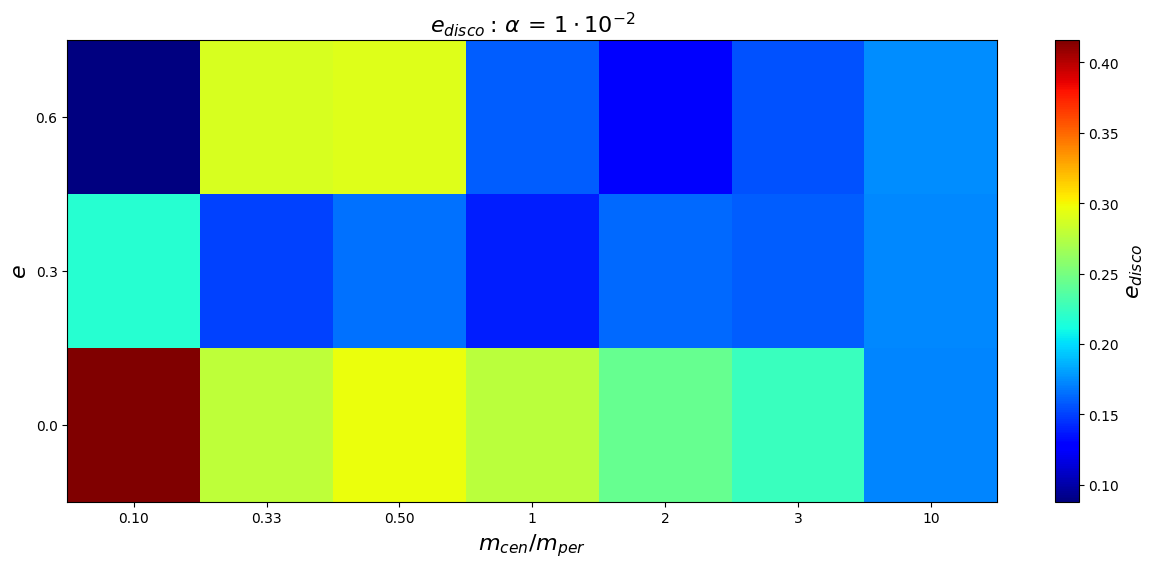

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

#Riempio i vari raggi del disco
e_disco = np.zeros((3,7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            e_disco[i, j] = ecc_A2_e0[j]
        elif i==1:
            e_disco[i, j] = ecc_A2_e3[j]
        elif i==2:
            e_disco[i, j] = ecc_A2_e6[j]


# Disegnare il color-plot
cax = ax.pcolormesh(mr, ecc, e_disco, cmap='jet', vmin = np.min(e_disco), vmax =np.max(e_disco))
cb = plt.colorbar(cax, label=r'$e_{disco}$')
cb.set_label(label=r'$e_{disco}$', fontsize = 16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax.set_ylabel(r"$e$", fontsize = 16)
ax.set_title(r"$e_{disco}:\,\alpha\,=\,1 \cdot 10^{-2}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Viscosità media </span>

<center>

### Eccentricità binaria: e = 0.0

In [12]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e0 = np.zeros(7)
ecc_A3_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A3_e0[h] = rag.sum()/len(rag)
    ecc_A3_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e0[h], 3)))


Il raggio di troncamento è: 0.131 a.     L'eccentricità è pari a: 0.386
Il raggio di troncamento è: 0.194 a.     L'eccentricità è pari a: 0.311
Il raggio di troncamento è: 0.22 a.     L'eccentricità è pari a: 0.285
Il raggio di troncamento è: 0.267 a.     L'eccentricità è pari a: 0.311
Il raggio di troncamento è: 0.321 a.     L'eccentricità è pari a: 0.266
Il raggio di troncamento è: 0.354 a.     L'eccentricità è pari a: 0.251
Il raggio di troncamento è: 0.452 a.     L'eccentricità è pari a: 0.187


### Eccentricità binaria: e = 0.3

In [13]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e3 = np.zeros(7)
ecc_A3_e3 = np.zeros(7)



for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A3_e3[h] = rag.sum()/len(rag)
    ecc_A3_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e3[h], 3)))


Il raggio di troncamento è: 0.102 a.     L'eccentricità è pari a: 0.185
Il raggio di troncamento è: 0.152 a.     L'eccentricità è pari a: 0.192
Il raggio di troncamento è: 0.171 a.     L'eccentricità è pari a: 0.213
Il raggio di troncamento è: 0.207 a.     L'eccentricità è pari a: 0.184
Il raggio di troncamento è: 0.245 a.     L'eccentricità è pari a: 0.156
Il raggio di troncamento è: 0.271 a.     L'eccentricità è pari a: 0.176
Il raggio di troncamento è: 0.34 a.     L'eccentricità è pari a: 0.192


### Eccentricità binaria: e = 0.6

In [14]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A3_e6 = np.zeros(7)
ecc_A3_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-3/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A3_e6[h] = rag.sum()/len(rag)
    ecc_A3_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A3_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A3_e6[h], 3)))


Il raggio di troncamento è: 0.061 a.     L'eccentricità è pari a: 0.077
Il raggio di troncamento è: 0.091 a.     L'eccentricità è pari a: 0.224
Il raggio di troncamento è: 0.103 a.     L'eccentricità è pari a: 0.222
Il raggio di troncamento è: 0.122 a.     L'eccentricità è pari a: 0.171
Il raggio di troncamento è: 0.144 a.     L'eccentricità è pari a: 0.126
Il raggio di troncamento è: 0.159 a.     L'eccentricità è pari a: 0.145
Il raggio di troncamento è: 0.201 a.     L'eccentricità è pari a: 0.124


### Colorplot riassuntivo

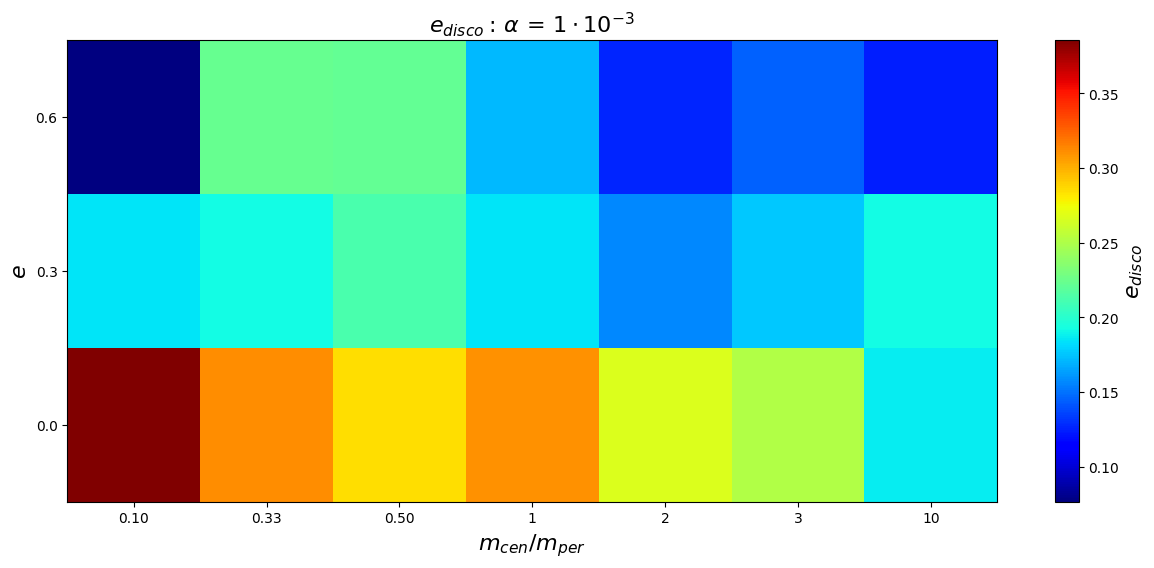

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

#Riempio i vari raggi del disco
e_disco = np.zeros((3,7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            e_disco[i, j] = ecc_A3_e0[j]
        elif i==1:
            e_disco[i, j] = ecc_A3_e3[j]
        elif i==2:
            e_disco[i, j] = ecc_A3_e6[j]


# Disegnare il color-plot
cax = ax.pcolormesh(mr, ecc, e_disco, cmap='jet', vmin = np.min(e_disco), vmax =np.max(e_disco))
cb = plt.colorbar(cax, label=r'$e_{disco}$')
cb.set_label(label=r'$e_{disco}$', fontsize = 16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax.set_ylabel(r"$e$", fontsize = 16)
ax.set_title(r"$e_{disco}:\,\alpha\,=\,1 \cdot 10^{-3}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:blue;"> Viscosità minima </span>

<center>

### Eccentricità binaria: e = 0.0

In [16]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmin = np.array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
rmax = np.array([3.5, 4.0, 4.0, 8.0, 7.0, 7.0, 7.0])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e0 = np.zeros(7)
ecc_A4_e0 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/NoEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A4_e0[h] = rag.sum()/len(rag)
    ecc_A4_e0[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e0[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e0[h], 3)))


Il raggio di troncamento è: 0.127 a.     L'eccentricità è pari a: 0.311
Il raggio di troncamento è: 0.185 a.     L'eccentricità è pari a: 0.288
Il raggio di troncamento è: 0.209 a.     L'eccentricità è pari a: 0.263
Il raggio di troncamento è: 0.259 a.     L'eccentricità è pari a: 0.315
Il raggio di troncamento è: 0.307 a.     L'eccentricità è pari a: 0.318
Il raggio di troncamento è: 0.341 a.     L'eccentricità è pari a: 0.274
Il raggio di troncamento è: 0.443 a.     L'eccentricità è pari a: 0.21


### Eccentricità binaria: e = 0.3

In [17]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([3.0, 3.0, 3.5, 5.0, 5.0, 5.0, 6.0])
rmin = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e3 = np.zeros(7)
ecc_A4_e3 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/MedEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A4_e3[h] = rag.sum()/len(rag)
    ecc_A4_e3[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e3[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e3[h], 3)))


Il raggio di troncamento è: 0.095 a.     L'eccentricità è pari a: 0.179
Il raggio di troncamento è: 0.141 a.     L'eccentricità è pari a: 0.282
Il raggio di troncamento è: 0.159 a.     L'eccentricità è pari a: 0.245
Il raggio di troncamento è: 0.198 a.     L'eccentricità è pari a: 0.194
Il raggio di troncamento è: 0.234 a.     L'eccentricità è pari a: 0.213
Il raggio di troncamento è: 0.259 a.     L'eccentricità è pari a: 0.204
Il raggio di troncamento è: 0.324 a.     L'eccentricità è pari a: 0.222


### Eccentricità binaria: e = 0.6

In [18]:
num = np.array([41, 41, 41, 41, 41, 41, 41])
rmax = np.array([2.0, 2.5, 3.0, 4.0, 4.0, 4.0, 5.0])
rmin = np.array([0.2, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])
dist = np.array([12, 12, 12, 15.13, 11.34, 10.06, 8.32])
sax_A4_e6 = np.zeros(7)
ecc_A4_e6 = np.zeros(7)


for h in range(0, len(massr)):

    rag = np.zeros(num[h])
    ecc_out = np.zeros(num[h])

    for k in range(0, num[h]):

        rho = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasdens"+str(60+k)+".dat").reshape(384, 1152)
        vx = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvx"+str(60+k)+".dat").reshape(384, 1152)
        vy = np.fromfile("Alpha-4/HighEcc/MR"+massr[h]+"/gasvy"+str(60+k)+".dat").reshape(384, 1152)


        #Creo la griglia radiale corretta
        r = np.linspace(rmin[h], rmax[h], 385)
        r_plot = np.zeros(384)
        rcal = np.zeros((384, 1152))
        acal = np.zeros((384, 1152))
        uno = np.zeros((384, 1152))
        for i in range(0, len(r_plot)):
        
            #Area delle cellette
            area = np.pi * (r[i+1]**2 - r[i]**2)/1152

            #Posizione centrale delle cellette
            r_plot[i] = (r[i+1] + r[i])/2

            for j in range(0, 1152):
                acal[i, j] = area
                rcal[i, j] = r_plot[i]
                uno[i, j] = 1


        ene = 0.5 * (vx**2 + vy**2) - 1.0/rcal  #Energie
        sax = - 1/(2 * ene * dist[h])            #Semi-assi maggiori
        mass = rho * acal                       #Massa celle

        #Effettuo i reshape necessari
        vx.reshape(384 * 1152)
        sax.reshape(384 * 1152)
        uno.reshape(384 * 1152)
        rcal.reshape(384 * 1152)
        mass.reshape(384 * 1152)

        eps = np.sqrt(np.maximum(uno - (((uno+mass) * rcal * vx)**2)/(sax * dist[h]), 0))

        #----------------------------------------------#
        #      Determino semi-asse di troncamento      #
        #----------------------------------------------#

        #Creo contenitore per masse progressive 
        m_prog = []
        sax_mag = np.linspace(0, 0.5, 1000)

        #Creo le masse progressive
        for i in range(0, len(sax_mag)):
            m_prog.append(mass[sax < sax_mag[i]].sum())

        m_prog = np.array(m_prog)
        for i in range(0, len(sax_mag)):
            if m_prog[i] >= 0.999 * m_prog[999]:
                ind = i
                rag[k] = sax_mag[ind]
                break  
        

        mask = np.logical_and(sax < sax_mag[ind + 1], sax > sax_mag[ind - 1], np.log10(rho) > -8.0)
        ecc = eps[mask]
        ecc_out[k] = ecc.sum() / len(ecc)

    sax_A4_e6[h] = rag.sum()/len(rag)
    ecc_A4_e6[h] = ecc_out.sum()/len(ecc_out)
    print("Il raggio di troncamento è: " + str(round(sax_A4_e6[h], 3)) + " a.     L'eccentricità è pari a: " + str(round(ecc_A4_e6[h], 3)))


Il raggio di troncamento è: 0.056 a.     L'eccentricità è pari a: 0.071
Il raggio di troncamento è: 0.083 a.     L'eccentricità è pari a: 0.243
Il raggio di troncamento è: 0.094 a.     L'eccentricità è pari a: 0.221
Il raggio di troncamento è: 0.117 a.     L'eccentricità è pari a: 0.179
Il raggio di troncamento è: 0.138 a.     L'eccentricità è pari a: 0.148
Il raggio di troncamento è: 0.153 a.     L'eccentricità è pari a: 0.158
Il raggio di troncamento è: 0.193 a.     L'eccentricità è pari a: 0.14


### Colorplot riassunto

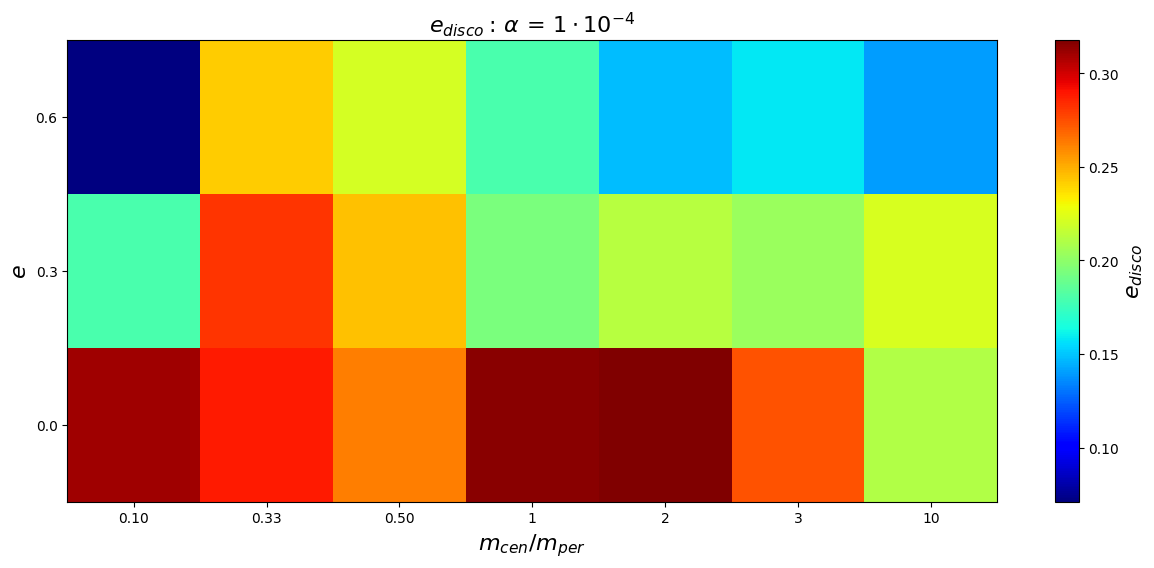

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))

# Crea una griglia di valori mass ratios ed eccetricità
mr = np.array([1, 3, 5, 7, 9, 11, 13])
ecc = np.array([1, 3, 5])
mr, ecc = np.meshgrid(mr, ecc)

#Riempio i vari raggi del disco
e_disco = np.zeros((3,7))
for i in range(0,3):
    for j in range(0, 7):

        if i==0:
            e_disco[i, j] = ecc_A4_e0[j]
        elif i==1:
            e_disco[i, j] = ecc_A4_e3[j]
        elif i==2:
            e_disco[i, j] = ecc_A4_e6[j]


# Disegnare il color-plot
cax = ax.pcolormesh(mr, ecc, e_disco, cmap='jet', vmin = np.min(e_disco), vmax =np.max(e_disco))
cb = plt.colorbar(cax, label=r'$e_{disco}$')
cb.set_label(label=r'$e_{disco}$', fontsize = 16)
ax.set_xlabel(r"$m_{cen}/m_{per}$", fontsize = 16)
ax.set_ylabel(r"$e$", fontsize = 16)
ax.set_title(r"$e_{disco}:\,\alpha\,=\,1 \cdot 10^{-4}$", fontsize = 16)

ax.set_xticks(mr[0])
ax.set_yticks([1, 3, 5])

ax.set_yticklabels(['0.0', '0.3', '0.6'])
ax.set_xticklabels(['0.10', '0.33', '0.50', '1', '2', '3', '10'])

plt.show()

<center>

# <span style="color:red;"> Scatter plot riassuntivo </span>

<center>

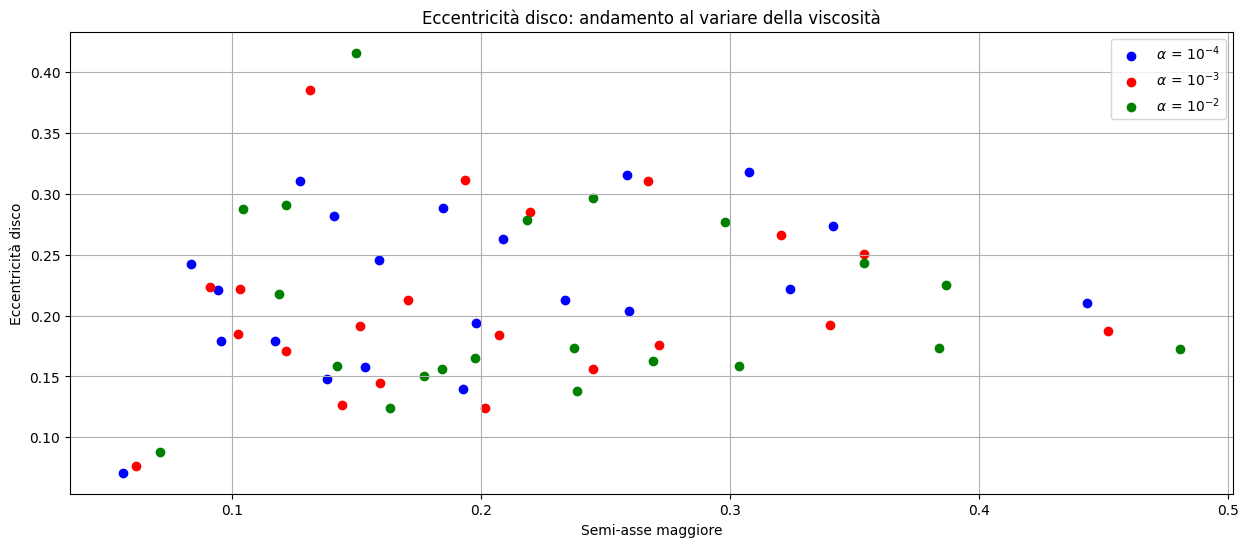

In [20]:
fig = plt.figure(figsize=(15, 6))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

#-------------------------------------------#
#             Viscosità minima              #
#-------------------------------------------#
plt.scatter(sax_A4_e0, ecc_A4_e0, color = 'blue', label=r'$\alpha\,=\,10^{-4}$')
plt.scatter(sax_A4_e3, ecc_A4_e3, color = 'blue')
plt.scatter(sax_A4_e6, ecc_A4_e6, color = 'blue')

#-------------------------------------------#
#             Viscosità media               #
#-------------------------------------------#
plt.scatter(sax_A3_e0, ecc_A3_e0, color = 'red', label=r'$\alpha\,=\,10^{-3}$')
plt.scatter(sax_A3_e3, ecc_A3_e3, color = 'red')
plt.scatter(sax_A3_e6, ecc_A3_e6, color = 'red')

#-------------------------------------------#
#             Viscosità massima             #
#-------------------------------------------#
plt.scatter(sax_A2_e0, ecc_A2_e0, color = 'green', label=r'$\alpha\,=\,10^{-2}$')
plt.scatter(sax_A2_e3, ecc_A2_e3, color = 'green')
plt.scatter(sax_A2_e6, ecc_A2_e6, color = 'green')



# Aggiungere etichette agli assi
plt.xlabel('Semi-asse maggiore')
plt.ylabel('Eccentricità disco')
plt.title('Eccentricità disco: andamento al variare della viscosità')

# Aggiungere una legenda
plt.legend()

# Visualizzare il scatter
plt.grid(True)
plt.show()

<center>

# <span style="color:red;"> Classificazione per eccentricità della binaria </span>

<center>

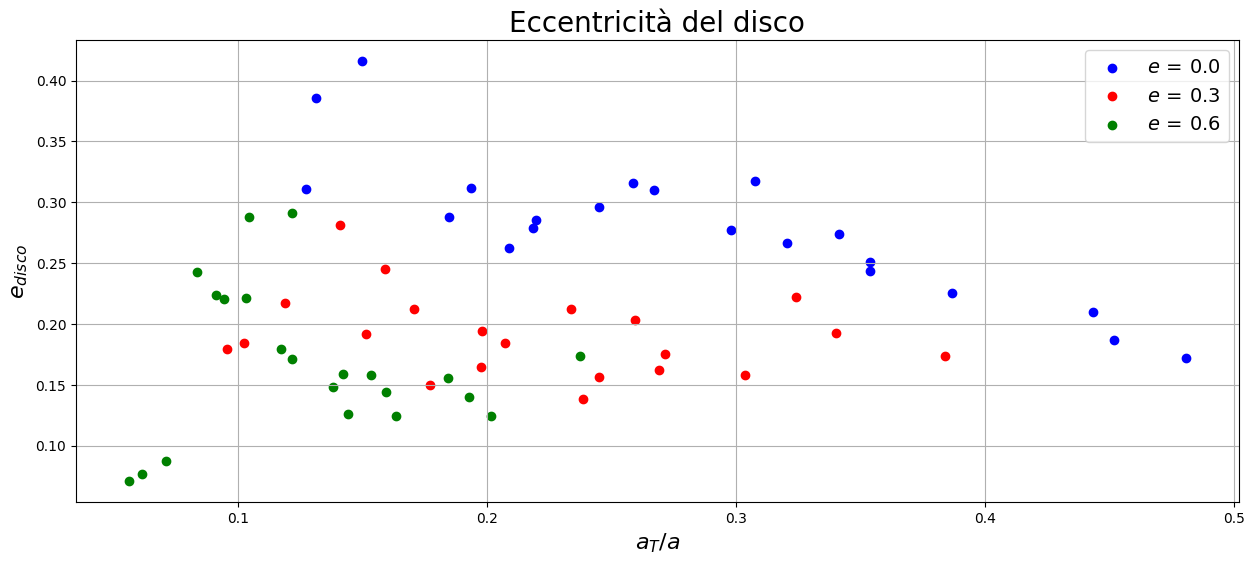

In [22]:
fig = plt.figure(figsize=(15, 6))

massr = np.array([0.1, 0.33, 0.5, 1, 2, 3, 10])

#-------------------------------------------#
#             Viscosità minima              #
#-------------------------------------------#
plt.scatter(sax_A4_e0, ecc_A4_e0, color = 'blue', label=r'$e\,=\,0.0$')
plt.scatter(sax_A4_e3, ecc_A4_e3, color = 'red', label=r'$e\,=\,0.3$')
plt.scatter(sax_A4_e6, ecc_A4_e6, color = 'green', label=r'$e\,=\,0.6$')

#-------------------------------------------#
#             Viscosità media               #
#-------------------------------------------#
plt.scatter(sax_A3_e0, ecc_A3_e0, color = 'blue')
plt.scatter(sax_A3_e3, ecc_A3_e3, color = 'red')
plt.scatter(sax_A3_e6, ecc_A3_e6, color = 'green')

#-------------------------------------------#
#             Viscosità massima             #
#-------------------------------------------#
plt.scatter(sax_A2_e0, ecc_A2_e0, color = 'blue')
plt.scatter(sax_A2_e3, ecc_A2_e3, color = 'red')
plt.scatter(sax_A2_e6, ecc_A2_e6, color = 'green')



# Aggiungere etichette agli assi
plt.xlabel(r'$a_T/a$', fontsize = 16)
plt.ylabel(r'$e_{disco}$', fontsize = 16)
plt.title(r'Eccentricità del disco', fontsize = 20)

# Aggiungere una legenda
plt.legend(loc = 'best', fontsize = 14)

# Visualizzare il scatter
plt.grid(True)
plt.show()